In [256]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from matplotlib import pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore")
#Data Pipline
from sklearn.pipeline import Pipeline

#Data Transform
from sklearn.preprocessing import MinMaxScaler

#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV

#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn import tree

#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report

In [257]:
data = pd.read_csv("D:\Makeen\ProjectML\diabetes_prediction_dataset.csv")

In [258]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


 EDA

In [104]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


we have missing values

In [106]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [107]:
data.shape

(100000, 9)

In [108]:
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [109]:
data.isna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [110]:
 data["HbA1c_level"].isna().any()

False

In [111]:
 data["gender"].isna().any()

False

In [112]:
# Identify columns with non-numeric data
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns or convert them using one-hot encoding
data = pd.get_dummies(data, drop_first=True)


In [182]:
non_numeric_columns

['gender', 'smoking_history']

In [113]:
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


In [114]:
non_numeric_columns

['gender', 'smoking_history']

Split data

In [115]:
# Split the data into features (X) and target variable (y)
X = data.drop(['diabetes'],axis=1)
y = data['diabetes']

In [116]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,False,False,False,False,False,True,False


In [129]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,73.0,0,0,24.77,3.5,80,True,False,False,False,True,False,False
48955,80.0,0,0,24.60,5.7,145,True,False,False,False,False,True,False
44966,38.0,0,0,24.33,4.0,158,False,False,False,True,False,False,False
13568,26.0,0,0,18.87,5.0,100,False,False,False,False,False,False,True
92727,61.0,1,0,22.11,4.5,85,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,49.0,0,0,32.98,5.7,80,True,False,False,False,False,True,False
54886,15.0,0,0,28.10,5.0,159,False,False,False,False,False,True,False
76820,42.0,0,0,26.14,5.8,85,True,False,False,False,False,True,False
860,37.0,0,0,24.96,6.2,158,False,False,False,False,False,True,False


In [157]:
y_train.unique()

array([0, 1], dtype=int64)

Logistic Regression Pipline

Intialize the pipline

In [192]:
logistic_model_pipline=Pipeline([
    ("model", LogisticRegression()) #estimator
])

In [194]:

logistic_model_pipline.fit(X_train, y_train)

Pipeline(steps=[('model', LogisticRegression())])

In [196]:
# Make predictions on the test set
y_pred_LR = logistic_model_pipline.predict(X_test)

In [197]:
y_pred_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Model Evaluation

In [199]:
LR_accuracy=accuracy_score(y_test,y_pred_LR)
LR_accuracy

0.9552

In [203]:

LR_CR=classification_report(y_test,y_pred_LR)
print(LR_CR)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.85      0.58      0.69      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.78      0.83     20000
weighted avg       0.95      0.96      0.95     20000



In [164]:
X_test.shape, y_pred_l.shape

((20000, 13), (20000,))

Evaluate the model

In [259]:





from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
#y_pred = linear_model.predict(X_test).round()

print(confusion_matrix(y_test, y_pred_LR))
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_LR)

# Calculate the precision
precision = precision_score(y_test, y_pred_LR)

# Calculate the recall
recall = recall_score(y_test, y_pred_LR)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred_LR)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


[[18121   171]
 [  725   983]]
Accuracy: 0.9552
Precision: 0.8518197573656846
Recall: 0.5755269320843092
F1 Score: 0.6869322152341021


In [149]:
# Using classification_report to Print Scores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18292
           1       0.99      0.28      0.44      1708

    accuracy                           0.94     20000
   macro avg       0.96      0.64      0.70     20000
weighted avg       0.94      0.94      0.92     20000



In [150]:
y_pred_l = logistic_model.predict(X_test).round()

In [151]:
y_pred_l

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

use Linear Regression (OLS closed form solution)

In [ ]:
LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR_model.coef_, LR_model.intercept_

(array([ 0.00133803,  0.09244247,  0.11817645,  0.00405525,  0.08144681,
         0.00227524,  0.01268014, -0.04683423,  0.01052365,  0.00798245,
         0.02715048,  0.00978844,  0.01634411]),
 -0.8715818209053173)

In [ ]:
LR_model.score(X_train, y_train)

0.3501273616613515

In [ ]:
LR_model.score(X_test, y_test)

0.3447543280602635

In [ ]:
mean_squared_error(LR_model.predict(X_train), y_train)

0.050489898519079916

In [ ]:
y_hat = LR_model.predict(X_test)

In [ ]:
y_hat

array([-0.01068595, -0.04526431,  0.09533479, ..., -0.07025686,
        0.23281312,  0.09480094])

In [ ]:
mean_squared_error(y_hat, y_test)

0.051179168858889484

Decision Trees Pipline

In [ ]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train,y_train)
  #l=[*parameter]
  #return the best parameter
  return grid_search.best_params_



In [ ]:
#min_samples_split
model=tree.DecisionTreeClassifier()
parameters={'min_samples_split':list(range(10,70,10))}
best_param(model,parameters)

{'min_samples_split': 60}

In [ ]:
#max_depth
parameters1={'max_depth':list(range(5,40,4))}
best_param(model,parameters1)


{'max_depth': 5}

Intialize the pipline

In [ ]:
DT_pipline=Pipeline([
    ("model", tree.DecisionTreeClassifier(min_samples_split=60,max_depth=2)) #estimator
])

In [ ]:
DT_pipline

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=2, min_samples_split=60))])

Train the model

In [ ]:
DT_pipline.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=2, min_samples_split=60))])

In [ ]:
#prediction
DT_y_pred=DT_pipline.predict(X_test)

In [ ]:
DT_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#calculate the accuaracy
DT_accuracy=accuracy_score(y_test,DT_y_pred)
DT_accuracy

0.97215

In [ ]:
#Classification report

DT_CR=classification_report(y_test,DT_y_pred)
print(DT_CR)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



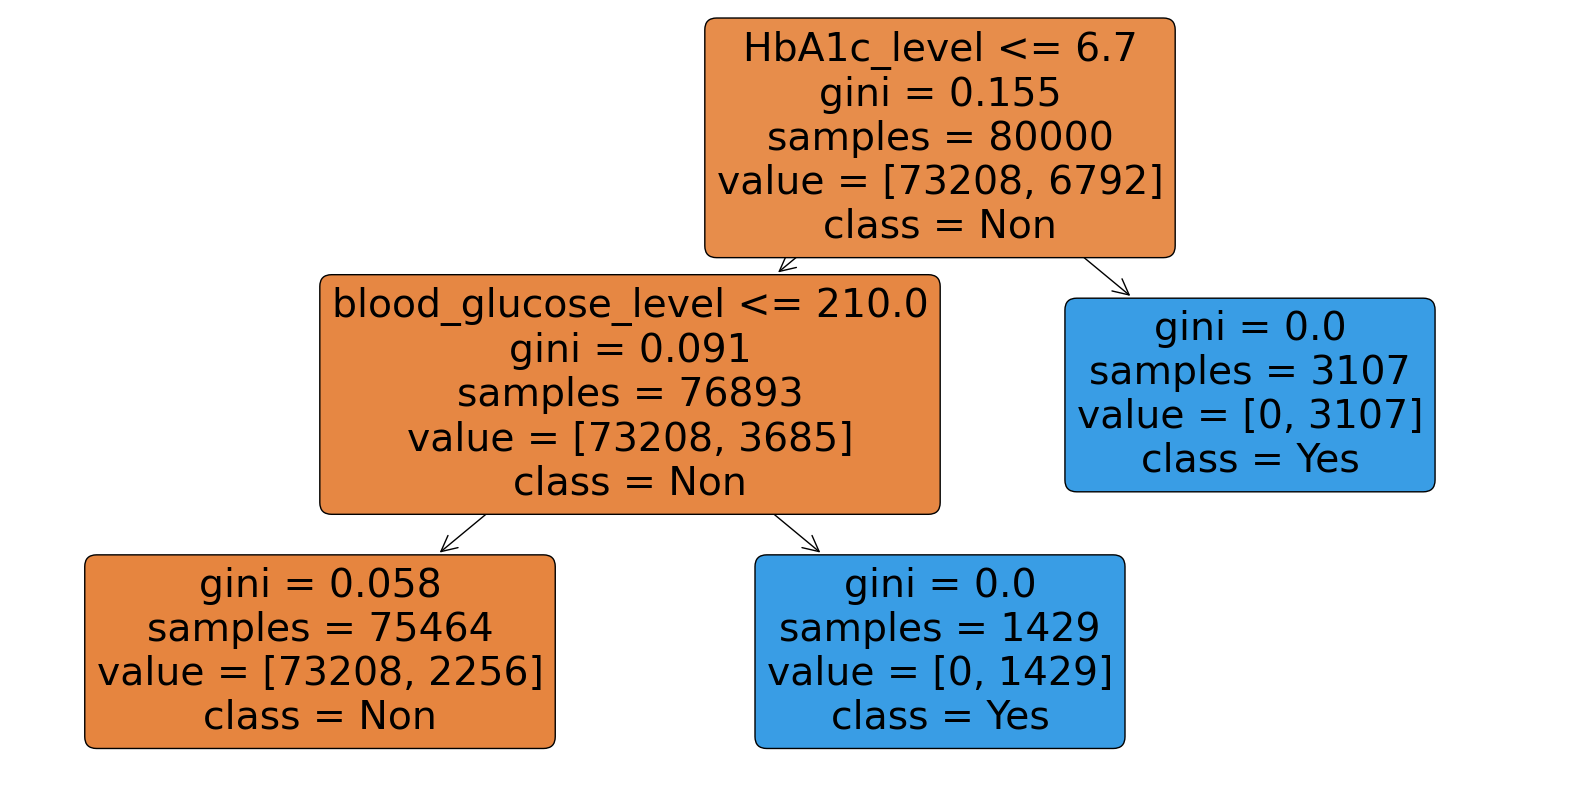

In [ ]:
plt.figure(figsize=(20,10))

feature_names=list(data.columns)
tree.plot_tree(DT_pipline.named_steps['model'],feature_names=feature_names,class_names=["Non", "Yes"],filled=True,rounded=True)
plt.show()

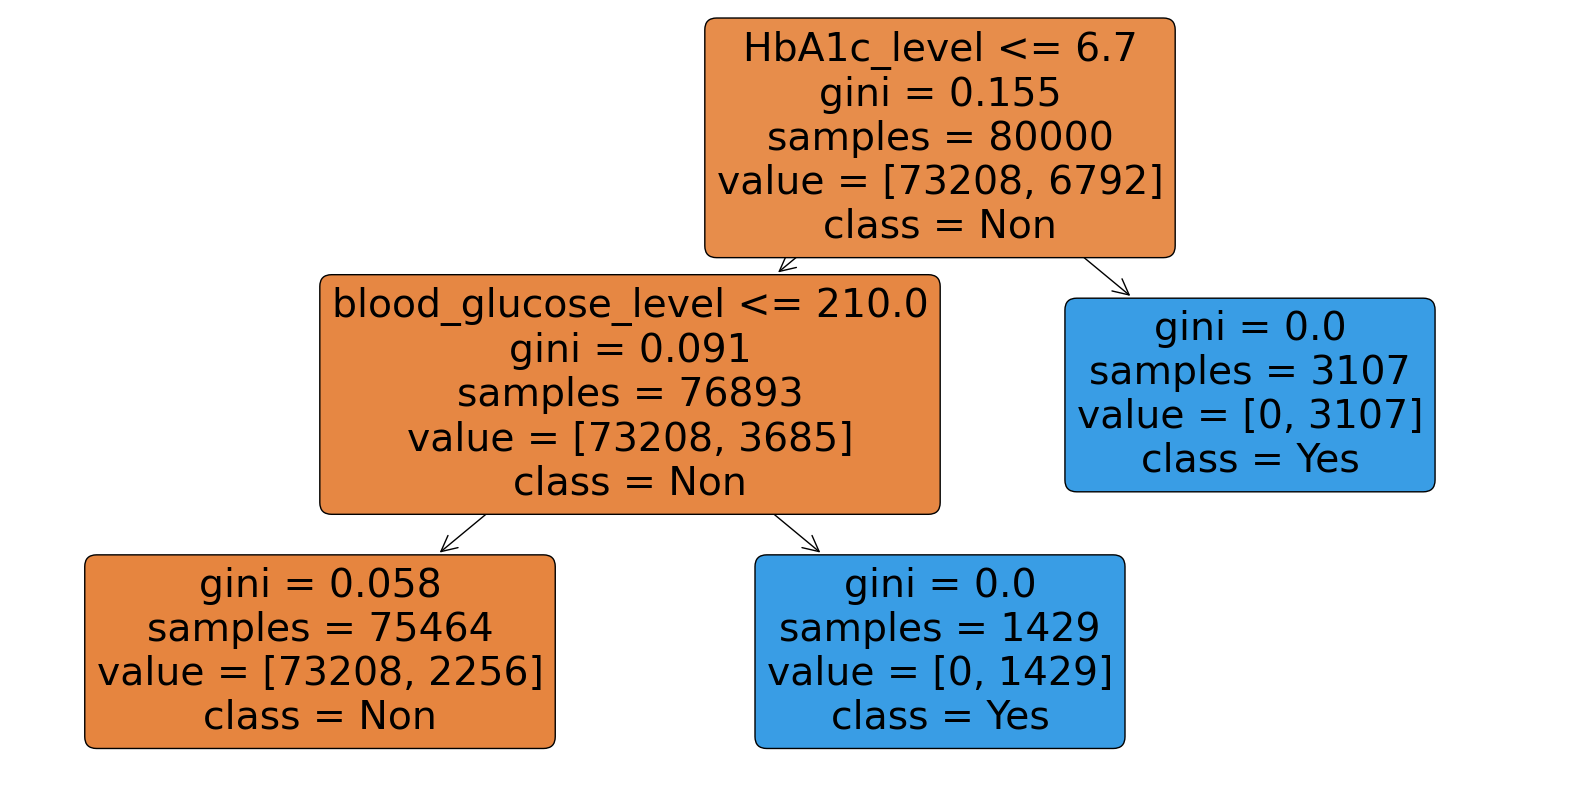

In [ ]:


plt.figure(figsize=(20, 10))
tree.plot_tree(DT_pipline.named_steps['model'],
         feature_names=list(data.columns),
         class_names=["Non", "Yes"],
         filled=True,
         rounded=True
         )

plt.show()

In [ ]:
DT_pipline.named_steps['model'].feature_importances_

array([0.01214692, 0.00189477, 0.        , 0.00120321, 0.65729155,
       0.32746354, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

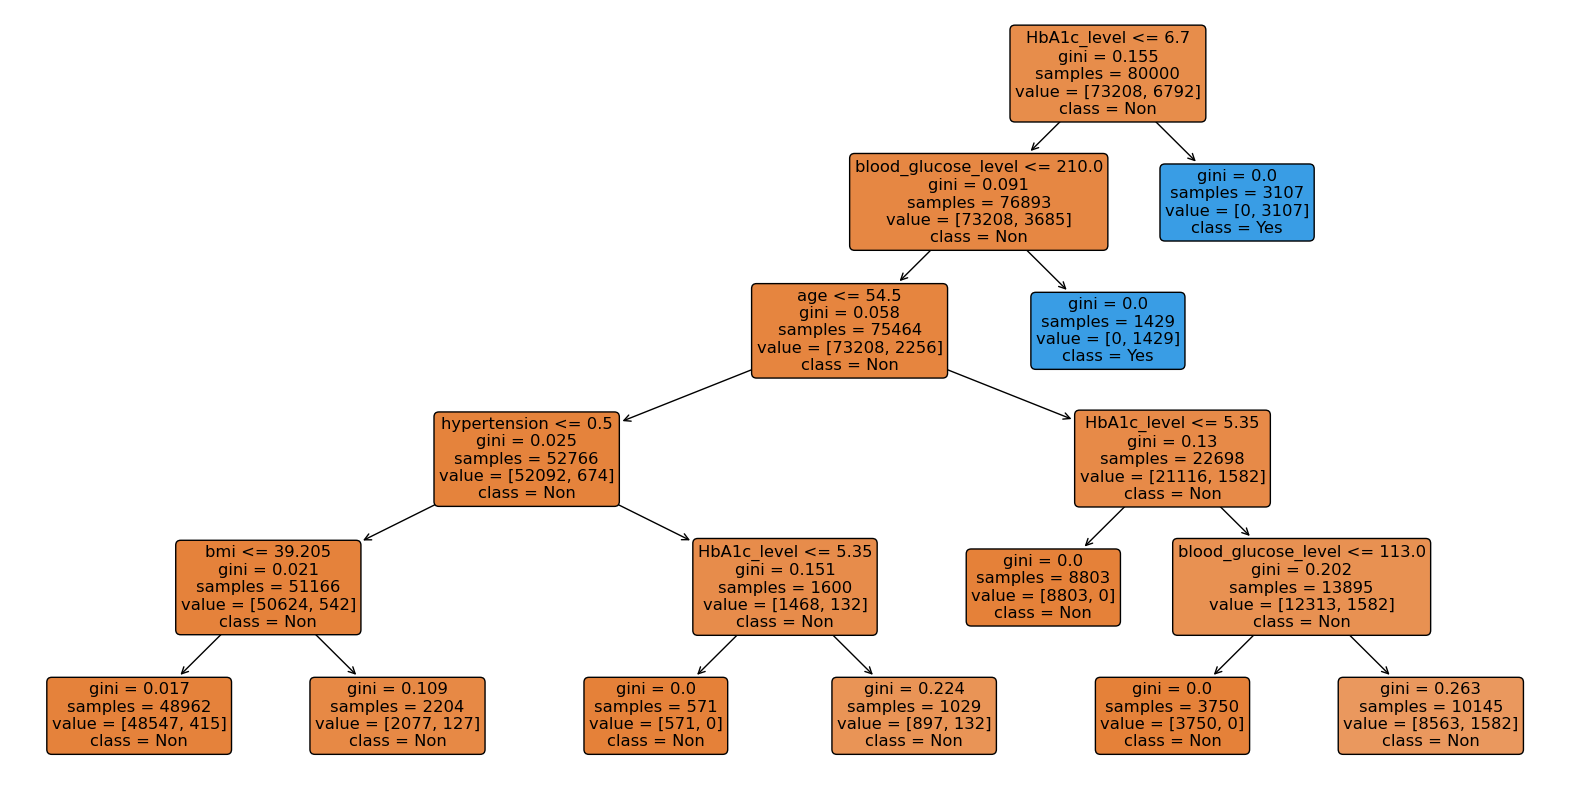

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
#Data Pipline
from sklearn.pipeline import Pipeline


clf = DecisionTreeClassifier(random_state = 42,max_depth=5,criterion='gini', min_samples_split=50)
clf.fit(X_train,y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf,
         feature_names=list(data.columns),
         class_names=["Non", "Yes"],
         filled=True,
         rounded=True
         )

plt.show()

In [ ]:

#Predict the response for test dataset
from sklearn import metrics
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96905


[Text(0.7083333333333334, 0.9166666666666666, 'x[4] <= 6.7\ngini = 0.155\nsamples = 80000\nvalue = [73208, 6792]'),
 Text(0.625, 0.75, 'x[5] <= 210.0\ngini = 0.091\nsamples = 76893\nvalue = [73208, 3685]'),
 Text(0.5416666666666666, 0.5833333333333334, 'x[0] <= 54.5\ngini = 0.058\nsamples = 75464\nvalue = [73208, 2256]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.025\nsamples = 52766\nvalue = [52092, 674]'),
 Text(0.16666666666666666, 0.25, 'x[3] <= 39.205\ngini = 0.021\nsamples = 51166\nvalue = [50624, 542]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.017\nsamples = 48962\nvalue = [48547, 415]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.109\nsamples = 2204\nvalue = [2077, 127]'),
 Text(0.5, 0.25, 'x[4] <= 5.35\ngini = 0.151\nsamples = 1600\nvalue = [1468, 132]'),
 Text(0.4166666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 571\nvalue = [571, 0]'),
 Text(0.5833333333333334, 0.08333333333333333, 'gini = 0.224\nsamples = 1029\nvalue =

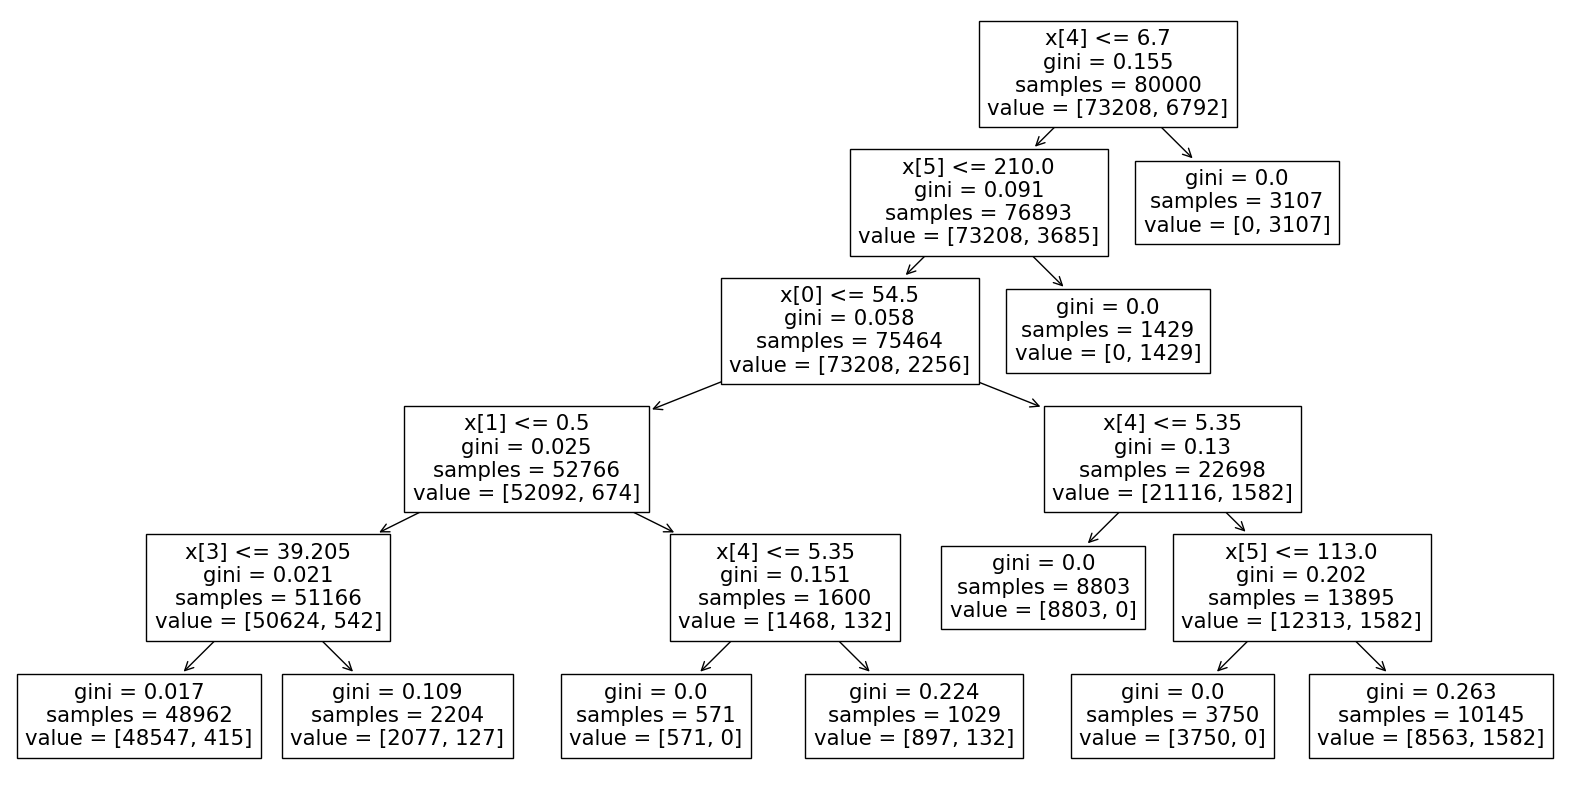

In [ ]:
# Separate features and target
target = data["diabetes"]
features = data.drop("diabetes", axis = 1)
# Split into train and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
# Fit the decision tree model
decisiontree = tree.DecisionTreeClassifier(random_state = 42,max_depth=5,criterion='gini', min_samples_split=50)
decisiontree = decisiontree.fit(features_train, target_train)
# Predict the target for the test set
target_pred = decisiontree.predict(features_test)
plt.figure(figsize=(20, 10))
tree.plot_tree(decisiontree)